## Motivation

This project explores educational trends in Denmark from 2008 to 2023. The dataset comes from Statistics Denmark and includes the number of educated people by region, gender, and education type.

I chose this topic because education plays a crucial role in income, employment, and social equity. This story is part of a larger group project that also examines crime and income.

My goal was to build an engaging and accessible data narrative for a general audience, while backing it up with robust data analysis and a predictive model.

# Education in Denmark: Who's Learning, and Where?
In this page, we explore **15 years of education data** (2008–2023) from across Denmark. The database that was used in this analysis is from Statistics Denmark - https://www.dst.dk/en which was saved as "Database" and after that I created two new datasets per sex ("Men" & "Women"). The primary goals of this analyis is to understand:
We focus on three main questions:
- How have gender dynamics shifted in education?
- Which regions are growing or lagging behind?
- What kinds of education programs are most or least popular?

# Basic Statistics and Preprocessing

At first, the database was A little chaotic, but I decided to make 3 excel files - one with total number of educated people and one for men and women, respectively.

The dataset includes separate files for men, women, and the combined total population. Each row represents a unique combination of region and education type, with columns for each year (2008–2023).

To prepare the data, I:
- Merged the male and female datasets
- Reshaped from wide to long format
- Cleaned region and education labels
- Aggregated totals by region, education type, and gender

This allowed flexible visualizations of trends over time and across subgroups.


## Denmark, A Nation Getting Smarter (2008–2023)

Over the past decade and a half, Denmark has become **consistently more educated**. Across all regions and fields, the number of people completing formal education has grown year after year.

Below, you can see the national trend from 2008 to 2023:

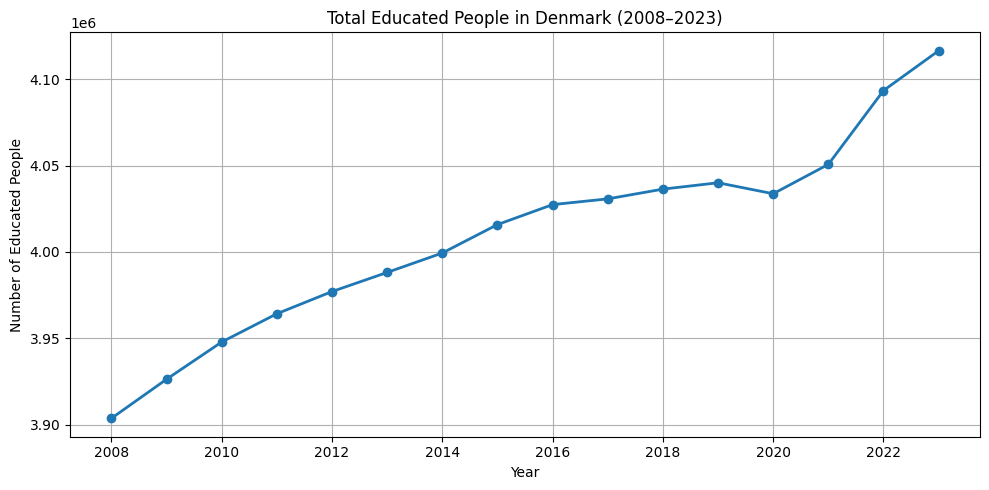

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and combine datasets
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")
men_df["Sex"] = "Men"
women_df["Sex"] = "Women"
combined_df = pd.concat([men_df, women_df], ignore_index=True)

# Reshape to long format
year_cols = [col for col in combined_df.columns if str(col).isdigit()]
long_df = combined_df.melt(
    id_vars=["Region", "Sex", "Education"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Count"
)
long_df["Year"] = long_df["Year"].astype(int)

# Group to get total educated count per year
national_totals = long_df.groupby("Year")["Count"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(national_totals["Year"], national_totals["Count"], marker='o', linewidth=2)
plt.title("Total Educated People in Denmark (2008–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Educated People")
plt.grid(True)
plt.tight_layout()
plt.show()

The line chart shows a steady increase in the number of educated people in Denmark from 2008 to 2023. Despite global disruptions like the 2008 financial crisis or the COVID-19 pandemic, education continued to expand, especially after 2019.

We observe:

- A gradual rise between 2008 and 2015

- A sharper acceleration after 2020, possibly reflecting a societal shift toward upskilling or reskilling in response to labor market changes

- No major dips, which highlights the resilience of Denmark’s education system

This confirms that Denmark is becoming a more educated society overall — but this alone doesn’t reveal who is driving the growth, or where it’s happening.

## Data Analysis

I analyzed the evolution of education in Denmark across time, gender, geography, and type.

Key steps included:
- National trend analysis (2008–2023)
- Gender shift in Copenhagen
- Top/Bottom 10 regional maps
- Education type growth (by gender)
- Machine learning forecast (linear regression for Copenhagen, 2030)

The ML model used a linear regression per gender, fitted on yearly totals, to predict trends through 2030. It confirmed that women's educational lead is widening.

##  Gender Dynamics in Education: Women Take the Lead

While national education levels are rising, an even more important shift is happening within: **women are increasingly leading this growth**.

To explore this shift, we look at Copenhagen — Denmark’s largest and most urbanized region. It serves as a strong case study for national trends, especially in education, employment, and social mobility.



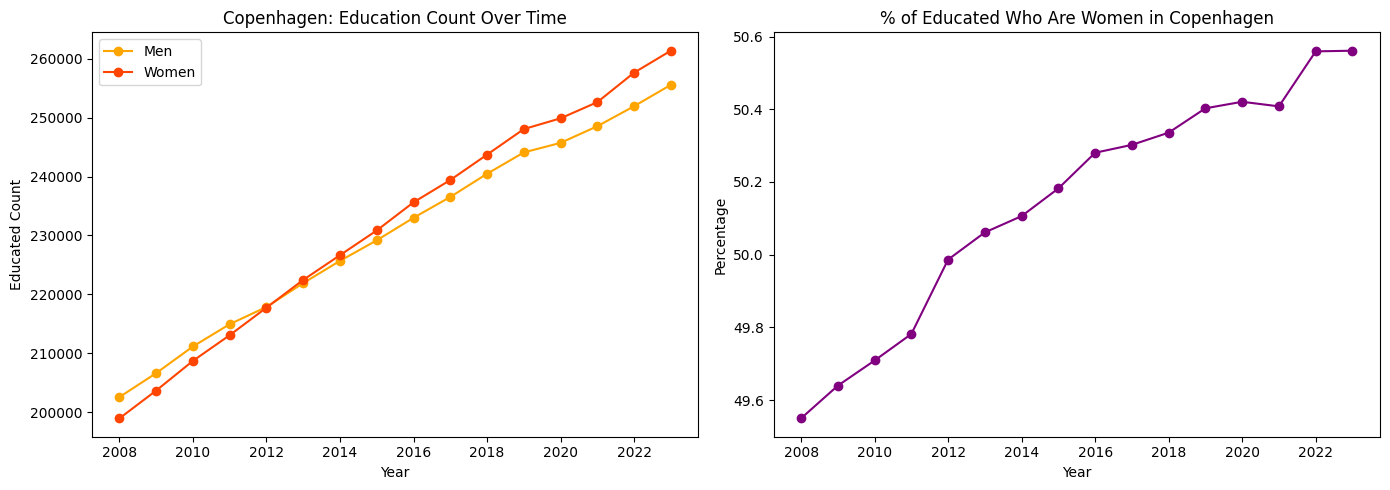

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")

# Filter for Copenhagen
men_cph = men_df[men_df["Region"] == "Copenhagen"].copy()
women_cph = women_df[women_df["Region"] == "Copenhagen"].copy()

# Identify year columns dynamically (e.g., 2008 to 2023)
year_cols = [col for col in men_cph.columns if col.isdigit()]

# Melt to long format
men_long = men_cph.melt(id_vars=["Region", "Education"], value_vars=year_cols, 
                        var_name="Year", value_name="Count")
women_long = women_cph.melt(id_vars=["Region", "Education"], value_vars=year_cols, 
                            var_name="Year", value_name="Count")

# Add gender labels
men_long["Sex"] = "Men"
women_long["Sex"] = "Women"

# Combine
combined = pd.concat([men_long, women_long], ignore_index=True)
combined["Year"] = combined["Year"].astype(int)

# Group by year and sex
yearly_counts = combined.groupby(["Year", "Sex"])["Count"].sum().reset_index()

# Pivot for plotting
pivot = yearly_counts.pivot(index="Year", columns="Sex", values="Count")

# Calculate % of women
pivot["Pct_Women"] = (pivot["Women"] / (pivot["Women"] + pivot["Men"])) * 100

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Left: Education count over time
ax1.plot(pivot.index, pivot["Men"], label="Men", marker="o", color="orange")
ax1.plot(pivot.index, pivot["Women"], label="Women", marker="o", color="orangered")
ax1.set_title("Copenhagen: Education Count Over Time")
ax1.set_ylabel("Educated Count")
ax1.set_xlabel("Year")
ax1.legend()

# Right: % of educated who are women
ax2.plot(pivot.index, pivot["Pct_Women"], marker="o", color="purple")
ax2.set_title("% of Educated Who Are Women in Copenhagen")
ax2.set_ylabel("Percentage")
ax2.set_xlabel("Year")

plt.tight_layout()
plt.show()

In 2008, men outnumbered women in Copenhagen's educated population, but then a major shift occurred in 2013 when women surpassed men in total educational participation. Since then, women have consistently maintained the lead in urban areas and across the country.

The right-hand plot shows that women now make up over **50.5%** of all educated individuals in Copenhagen.

## Where You Live Matters: The Urban Education Advantage

Copenhagen’s gender shift is part of a broader story — one that’s **regional as much as it is social**. If education is rising in Denmark, **where exactly is it rising fastest?**

To answer that, we visualized the **10 most educated regions in Denmark in 2023** using an interactive bubble map. The size of each bubble reflects the total number of educated individuals in that municipality.


In [39]:
import pandas as pd
import plotly.express as px

# Load total dataset
df_total = pd.read_excel("Database.xlsx")
df_total["Region"] = df_total["Region"].str.strip().str.lower()

# Group and sum total educated in 2023 by region
edu_total = df_total[["Region", "2023"]].groupby("Region").sum().reset_index()
edu_total.columns = ["Region", "Educated_2023"]

# Define coordinates for top 10 regions
coordinates = {
    "copenhagen": (12.5683, 55.6761),
    "aarhus": (10.2039, 56.1629),
    "aalborg": (9.9217, 57.0488),
    "odense": (10.3883, 55.4038),
    "vejle": (9.5364, 55.7113),
    "esbjerg": (8.4519, 55.4765),
    "frederiksberg": (12.5326, 55.6786),
    "randers": (10.0400, 56.4606),
    "silkeborg": (9.5610, 56.1620),
    "horsens": (9.8440, 55.8607),
}

# Filter top 10 regions and attach coordinates
top10 = edu_total.sort_values("Educated_2023", ascending=False).head(10).copy()
top10["Longitude"] = top10["Region"].map(lambda r: coordinates.get(r, (0, 0))[0])
top10["Latitude"] = top10["Region"].map(lambda r: coordinates.get(r, (0, 0))[1])
top10["Label"] = top10["Region"].str.title()

# Create interactive bubble map
fig = px.scatter_mapbox(
    top10,
    lat="Latitude",
    lon="Longitude",
    size="Educated_2023",
    color="Label",
    text="Label",
    size_max=50,
    zoom=5.5,
    center={"lat": 56.0, "lon": 10.5},
    mapbox_style="carto-positron",
    title="Top 10 Most Educated Regions in Denmark (2023)"
)

fig.update_traces(marker=dict(opacity=0.75))
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, legend_title_text='Region')

fig.write_html("Top 10 Educated Regions.html")
fig.show()

C:\Users\lykos\AppData\Local\Temp\ipykernel_6328\3073755093.py:33: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Copenhagen is the clear front-runner — its bubble dominates the map, with more than **500,000 educated individuals**, nearly **double that of Aarhus**, the second most educated city.

Urban centers like Odense, Aalborg, and Frederiksberg follow, reinforcing a familiar pattern: **education tends to concentrate in cities**.

Interestingly, smaller municipalities like **Silkeborg and Horsens** also make the top 10, suggesting that **not all educational growth is confined to the largest metros**. These outliers hint at regional strategies or institutions driving local educational success.

## The Other Side of the Map: Underserved Regions

While our previous map showed where education is thriving, it’s equally important to highlight where it's lacking. **Inequality in education is geographic** — and stark.

The bubble map below shows the **10 least educated regions** in Denmark, based on the number of educated people in 2023.

In [ ]:
import pandas as pd
import plotly.express as px

# Load total dataset
df_total = pd.read_excel("Database.xlsx")
df_total["Region"] = df_total["Region"].str.strip().str.lower()

# Total educated by region in 2023
edu_total = df_total[["Region", "2023"]].groupby("Region").sum().reset_index()
edu_total.columns = ["Region", "Educated_2023"]

# Bottom 10 regions
bottom10 = edu_total.sort_values("Educated_2023", ascending=True).head(10).copy()
bottom10["Label"] = bottom10["Region"].str.title()

# Accurate coordinates for small/rural municipalities
coords = {
    "christiansø": (15.1891, 55.3200),
    "læsø": (11.0007, 57.2843),
    "fanø": (8.3973, 55.4071),
    "samsø": (10.6096, 55.8611),
    "ærø": (10.3599, 54.8814),
    "langeland": (10.7530, 54.8896),
    "dragør": (12.6680, 55.5920),
    "vallensbæk": (12.3894, 55.6150),
    "lemvig": (8.3124, 56.5623),
    "morsø": (8.5610, 56.7957),
}

# Assign lat/lon
bottom10["Longitude"] = bottom10["Region"].map(lambda r: coords.get(r, (0, 0))[0])
bottom10["Latitude"] = bottom10["Region"].map(lambda r: coords.get(r, (0, 0))[1])

# Create interactive map
fig = px.scatter_mapbox(
    bottom10,
    lat="Latitude",
    lon="Longitude",
    size="Educated_2023",
    color="Label",
    text="Label",
    size_max=50,
    zoom=6,
    center={"lat": 56.2, "lon": 10.5},
    mapbox_style="carto-positron",
    title="Bottom 10 Least Educated Regions in Denmark (2023)"
)

fig.update_traces(marker=dict(opacity=0.75))
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}, legend_title_text='Region')

fig.write_html("Bottom 10 Least Educated Regions.html")
fig.show()

C:\Users\lykos\AppData\Local\Temp\ipykernel_6328\1667618148.py:35: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/




These regions are mostly **small islands and rural municipalities**, like Christiansø, Læsø, Fanø, and Samsø. With populations often under 5,000, their absolute education numbers are naturally lower — but this still reflects **limited access to higher education institutions, fewer job market incentives, and perhaps migration of young talent to cities**.

Notably, even some **suburban or peri-urban** places like Dragør and Vallensbæk appear on this list — pointing to challenges beyond just isolation.

## What Are People Studying?

So far, we’ve seen **where** people are getting educated. But what about **what** they’re studying?

Understanding which types of education dominate in each region can offer insight into **regional economies, labor market demands, and institutional specializations**.

To explore this, we break down the top 5 most educated regions by **education type** in 2023.




In [37]:
import pandas as pd
import plotly.express as px

# Load and prepare dataset
df_total = pd.read_excel("Database.xlsx")
df_total["Region"] = df_total["Region"].str.strip().str.lower()

# Select relevant columns
edu_by_type = df_total[["Region", "Education", "2023"]].copy()
edu_by_type.columns = ["Region", "EducationType", "Educated_2023"]

# Group by region and education type
region_type_totals = edu_by_type.groupby(["Region", "EducationType"]).sum().reset_index()

# Focus on top 5 regions by total educated population
top_regions = df_total.groupby("Region")["2023"].sum().sort_values(ascending=False).head(5).index.tolist()
filtered = region_type_totals[region_type_totals["Region"].isin(top_regions)]

# Plot interactive grouped bar chart
fig = px.bar(
    filtered,
    x="EducationType",
    y="Educated_2023",
    color="Region",
    barmode="group",
    title="Distribution of Education Types Across Top 5 Regions (2023)"
)

fig.update_layout(xaxis_tickangle=-45)
fig.write_html("Distribution of Education Types Across Top 5 regions.html")
fig.show()


Across all five regions — Copenhagen, Aarhus, Odense, Aalborg, and Frederiksberg — **Bachelor’s and Master’s programs dominate**, highlighting the urban concentration of higher education institutions.

However, variation exists:

- **Odense** shows a stronger presence of **Vocational Education and Training (VET)**, likely due to its historical industry links.
- **Aarhus** and **Copenhagen** stand out for **PhD and advanced academic programs**, reflecting the location of major universities.
- **Frederiksberg**, despite its size, shows high engagement in **social sciences and health programs**, which aligns with local institutional focus areas.

## How Education Types Have Evolved Over Time

After comparing what regions prioritize, we now zoom out to look at **national trends in education types** from 2008 to 2023.

Each line in the chart below represents a different type of education — from primary schooling to PhDs — and shows how participation in each has changed over the past 15 years.


In [36]:
import pandas as pd
import plotly.express as px

# Load data
df_total = pd.read_excel("Database.xlsx")

# Select only year columns
year_cols = [col for col in df_total.columns if col.isdigit()]
edu_type_trend = df_total[["Education"] + year_cols].groupby("Education").sum().reset_index()

# Reshape to long format
edu_type_melted = edu_type_trend.melt(
    id_vars="Education",
    var_name="Year",
    value_name="Educated"
)
edu_type_melted["Year"] = edu_type_melted["Year"].astype(int)

# Create line chart
fig = px.line(
    edu_type_melted,
    x="Year",
    y="Educated",
    color="Education",
    markers=True,
    title="Evolution of Education Types Over Time (2008–2023)"
)

fig.update_layout(
    legend_title_text='Education Type',
    xaxis_title="Year",
    yaxis_title="Educated People"
)
fig.write_html("Evolution of Education Types Over Time.html")
fig.show()

- **Bachelor’s and Master’s programs** show the most consistent growth, reflecting Denmark’s shift toward a highly educated workforce.
- **Primary education and youth education programs** remain stable or decline slightly — likely because these levels are more population-based and less influenced by policy or economic trends.
- **PhD programs** have grown modestly, but remain small in absolute numbers.
- Some **vocational and trade programs** appear to plateau, especially in the years following 2015 — suggesting either saturation or a societal pivot away from manual professions.

# Genre and Visual Narrative

This project uses a **Linear Narrative** genre, following the structure of a magazine article. Each section builds on the last — moving from national trends to gender, geography, education type, and finally forecasting.

According to Segel & Heer’s Figure 7:

**Visual Narrative Tools Used:**
- **Highlighting:** Colored traces and bars emphasize gender/region differences
- **Annotation:** Text blocks and legends clarify key messages
- **Zooming:** Regional maps and forecast plots offer detail on specific areas

**Narrative Structure Tools Used:**
- **Drill-down:** We zoom from national to regional to educational-level insights
- **Ordering:** Each section builds logically on the previous one
- **Context + Detail:** We start with the big picture, then go deeper

##  Gender Differences Across Education Types

We've seen how education programs have evolved over time — but who is filling those seats?

The chart below breaks down **male and female participation** across all education types in 2023. It offers a clear snapshot of **gendered educational preferences** and highlights persistent divides between fields.

In [34]:
import pandas as pd
import plotly.express as px

# Load gender-separated data
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")

# Group by education type
men_type = men_df.groupby("Education")["2023"].sum().reset_index()
women_type = women_df.groupby("Education")["2023"].sum().reset_index()

# Rename columns
men_type.columns = ["Education", "Men_2023"]
women_type.columns = ["Education", "Women_2023"]

# Merge
gender_edu = pd.merge(men_type, women_type, on="Education")
gender_edu["Total"] = gender_edu["Men_2023"] + gender_edu["Women_2023"]

# Sort by total count
gender_edu_sorted = gender_edu.sort_values("Total", ascending=False)

# Reshape for Plotly
melted = gender_edu_sorted.melt(
    id_vars="Education",
    value_vars=["Men_2023", "Women_2023"],
    var_name="Sex",
    value_name="Count"
)

# Plot interactive grouped bar chart
fig = px.bar(
    melted,
    x="Education",
    y="Count",
    color="Sex",
    barmode="group",
    title="Gender Distribution by Education Type (2023)"
)

fig.update_layout(xaxis_tickangle=-45)
fig.write_html("Gender Distribution by Education Type.html")
fig.show()


- **Health and education programs** are overwhelmingly female-dominated — reflecting societal norms and career clustering still present in Denmark.
- **Technical and vocational education**, including trade and engineering pathways, remain male-heavy.
- **Bachelor’s and Master’s programs** are more balanced, but even here women slightly outnumber men in most fields.
- The biggest surprise? **PhD programs**, long male-dominated, are approaching parity — a promising sign of change in academia.

##  Who's Driving Growth in Education?

We’ve seen the gender split in 2023 — but how did we get here?

This chart compares the **percentage growth** in each type of education from 2008 to 2023, separated by gender. It shows not just where men and women are today, but **how fast each group is growing across different educational pathways**.


In [ ]:
import pandas as pd
import plotly.express as px

# Load data
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")

# Summarize for 2008 and 2023
men_growth = men_df.groupby("Education")[["2008", "2023"]].sum().reset_index()
women_growth = women_df.groupby("Education")[["2008", "2023"]].sum().reset_index()

# Calculate growth percentage
men_growth["Sex"] = "Men"
men_growth["Growth (%)"] = ((men_growth["2023"] - men_growth["2008"]) / men_growth["2008"]) * 100

women_growth["Sex"] = "Women"
women_growth["Growth (%)"] = ((women_growth["2023"] - women_growth["2008"]) / women_growth["2008"]) * 100

# Combine for plotting
growth_df = pd.concat([
    men_growth[["Education", "Sex", "Growth (%)"]],
    women_growth[["Education", "Sex", "Growth (%)"]]
])

# Plot grouped bar chart
fig = px.bar(
    growth_df,
    x="Education",
    y="Growth (%)",
    color="Sex",
    barmode="group",
    title="% Growth in Education Type by Gender (2008–2023)"
)

fig.update_layout(xaxis_tickangle=-45)
fig.write_html("Growth in Education Type by Gender.html")
fig.show()

- **Women lead growth in nearly all academic education categories**, including Bachelor’s, Master’s, and professional programs.
- Men show stronger growth in **vocational and trade-oriented programs**, although these categories are expanding more modestly overall.
- Some types of education — like **short-cycle tertiary or certain youth education tracks** — show negative or flat growth, especially among men.
- The gap in growth rate is most striking in higher education, where **women consistently outpace men by 30–50%** in relative terms.

## The Most Popular Education Types for Each Gender

After comparing how education types have grown differently for men and women, we now take a closer look at **which specific programs dominate** for each gender — and how participation in them has changed over time.

The plots below highlight the **Top 5 education types** for men and women respectively, showing yearly trends from 2008 to 2023.


In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Men and Women data
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")
men_df["Sex"] = "Men"
women_df["Sex"] = "Women"

# Combine datasets
combined_df = pd.concat([men_df, women_df], ignore_index=True)

# Melt to long format
year_cols = [col for col in combined_df.columns if col.isdigit()]
long_df = combined_df.melt(
    id_vars=["Region", "Sex", "Education"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Count"
)
long_df["Year"] = long_df["Year"].astype(int)

# Aggregate total by Education, Year, and Sex
education_totals = long_df.groupby(["Education", "Year", "Sex"])["Count"].sum().reset_index()

# Total count across all years per education type per sex
total_by_edu_sex = education_totals.groupby(["Education", "Sex"])["Count"].sum().reset_index()

# Get Top 5 education types by sex
top5_men_edu = total_by_edu_sex[total_by_edu_sex["Sex"] == "Men"].nlargest(5, "Count")["Education"]
top5_women_edu = total_by_edu_sex[total_by_edu_sex["Sex"] == "Women"].nlargest(5, "Count")["Education"]

# Filter data
men_data = education_totals[(education_totals["Sex"] == "Men") & (education_totals["Education"].isin(top5_men_edu))]
women_data = education_totals[(education_totals["Sex"] == "Women") & (education_totals["Education"].isin(top5_women_edu))]

# Create subplot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        "Men Top 5 Education Types",
        "Women Top 5 Education Types"
    ]
)

# Plot for Men
for edu in top5_men_edu:
    data = men_data[men_data["Education"] == edu]
    fig.add_trace(go.Scatter(
        x=data["Year"],
        y=data["Count"],
        mode="lines+markers",
        name=f"{edu} (Men)"
    ), row=1, col=1)

# Plot for Women
for edu in top5_women_edu:
    data = women_data[women_data["Education"] == edu]
    fig.add_trace(go.Scatter(
        x=data["Year"],
        y=data["Count"],
        mode="lines+markers",
        name=f"{edu} (Women)"
    ), row=1, col=2)

# Layout adjustments
fig.update_layout(
    height=500,
    width=1000,
    margin=dict(l=10, r=10, t=20, b=20)
)

fig.write_html("top5_education_types_men_women.html")

fig.show()

- **Men** tend to dominate in areas like **vocational education**, **engineering**, and **short-cycle technical programs** — paths often aligned with hands-on professions and technical fields.
- **Women** lead strongly in **health**, **education**, and **social sciences** — with growing participation across all five categories.
- For both sexes, the lines rise gradually, indicating consistent long-term growth — but **women’s lines rise more steeply**, echoing earlier observations about their leading role in education expansion.

##  The Other Side of the Spectrum: Bottom 5 Education Types

Just as some fields are surging, others are quietly falling behind.

To complete the picture, we examine the **bottom 5 education types** for men and women respectively — the least pursued programs over the 15-year span from 2008 to 2023.


In [28]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load Excel files
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")

# Add gender label
men_df["Sex"] = "Men"
women_df["Sex"] = "Women"

# Combine datasets
combined_df = pd.concat([men_df, women_df], ignore_index=True)

# Detect year columns
year_cols = [col for col in combined_df.columns if col.isdigit()]

# Reshape to long format
long_df = combined_df.melt(
    id_vars=["Region", "Sex", "Education"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Count"
)
long_df["Year"] = long_df["Year"].astype(int)

# Group by Education, Sex, Year
edu_year_totals = long_df.groupby(["Education", "Sex", "Year"])["Count"].sum().reset_index()

# Get total counts across all years
edu_totals = edu_year_totals.groupby(["Education", "Sex"])["Count"].sum().reset_index()

# Bottom 5 education types per sex
bottom5_men = edu_totals[edu_totals["Sex"] == "Men"].nsmallest(5, "Count")
bottom5_women = edu_totals[edu_totals["Sex"] == "Women"].nsmallest(5, "Count")

# Filter data
men_bottom5_data = edu_year_totals[
    (edu_year_totals["Sex"] == "Men") &
    (edu_year_totals["Education"].isin(bottom5_men["Education"]))
]
women_bottom5_data = edu_year_totals[
    (edu_year_totals["Sex"] == "Women") &
    (edu_year_totals["Education"].isin(bottom5_women["Education"]))
]

# Create subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        "Bottom 5 Education Types (Men)",
        "Bottom 5 Education Types (Women)"
    ]
)

# Plot for Men
for edu in bottom5_men["Education"]:
    data = men_bottom5_data[men_bottom5_data["Education"] == edu]
    fig.add_trace(go.Scatter(
        x=data["Year"], y=data["Count"],
        mode='lines+markers',
        name=f"{edu} (Men)"
    ), row=1, col=1)

# Plot for Women
for edu in bottom5_women["Education"]:
    data = women_bottom5_data[women_bottom5_data["Education"] == edu]
    fig.add_trace(go.Scatter(
        x=data["Year"], y=data["Count"],
        mode='lines+markers',
        name=f"{edu} (Women)"
    ), row=1, col=2)

# Layout adjustments
fig.update_layout(
    height=500,
    width=1000,
    margin=dict(l=10, r=10, t=20, b=20)
)

fig.write_html("bottom5_education_types_men_women.html")
fig.show()


- For **men**, the least pursued programs include **arts**, **nursing**, and **teaching** — traditionally female-dominated fields.
- For **women**, technical tracks such as **engineering**, **trade-oriented programs**, and **short-cycle technical education** appear at the bottom.
- Both charts show **flat or slow growth**, signaling persistent gender biases and limited efforts to diversify enrollment in these areas.

## What Comes Next? Forecasting Education in Copenhagen

To complete our analysis, we used a simple linear regression model to **predict education trends in Copenhagen through 2030** — separately for men and women.
Using data from 2008 to 2023, the model learns the historical trend and extends it into the future. This gives us a **data-driven view of where educational participation might be heading** if current patterns continue.


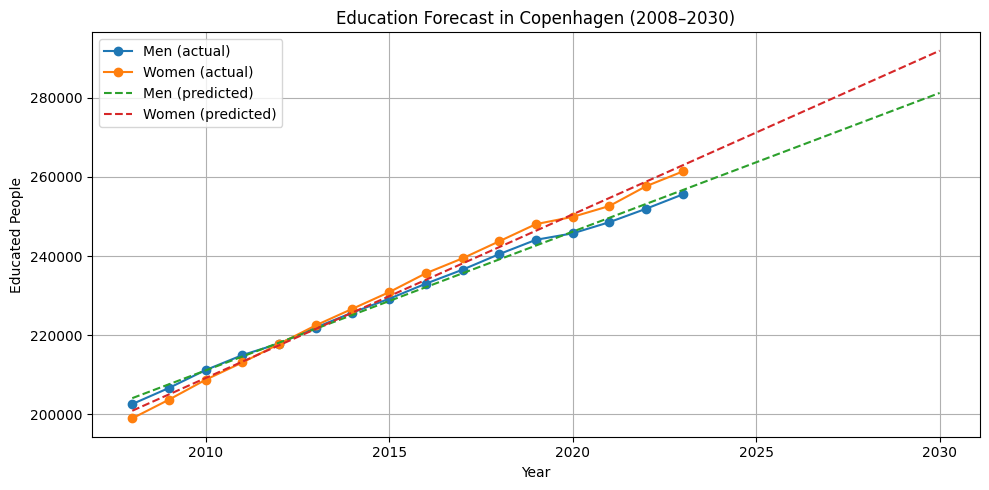

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
men_df = pd.read_excel("Men.xlsx")
women_df = pd.read_excel("Women.xlsx")
men_df["Sex"] = "Men"
women_df["Sex"] = "Women"

# Filter Copenhagen
cph_men = men_df[men_df["Region"].str.lower() == "copenhagen"].drop(columns=["Region", "Education"])
cph_women = women_df[women_df["Region"].str.lower() == "copenhagen"].drop(columns=["Region", "Education"])

# Aggregate total by year
men_ts = cph_men.drop(columns=["Sex"]).sum().T
women_ts = cph_women.drop(columns=["Sex"]).sum().T

# Prepare DataFrame
df_pred = pd.DataFrame({
    "Year": men_ts.index.astype(int),
    "Men": men_ts.values,
    "Women": women_ts.values
})

# Model
X = df_pred["Year"].values.reshape(-1, 1)
model_men = LinearRegression().fit(X, df_pred["Men"].values)
model_women = LinearRegression().fit(X, df_pred["Women"].values)

# Predict 2008–2030
future_years = np.arange(2008, 2031).reshape(-1, 1)
pred_men = model_men.predict(future_years)
pred_women = model_women.predict(future_years)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_pred["Year"], df_pred["Men"], "o-", label="Men (actual)")
plt.plot(df_pred["Year"], df_pred["Women"], "o-", label="Women (actual)")
plt.plot(future_years, pred_men, "--", label="Men (predicted)")
plt.plot(future_years, pred_women, "--", label="Women (predicted)")
plt.title("Education Forecast in Copenhagen (2008–2030)")
plt.xlabel("Year")
plt.ylabel("Educated People")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Both men and women are projected to continue growing their educational participation at a steady rate.
- **Women maintain a consistent lead**, reinforcing the reversal we observed earlier: the gender gap hasn’t just closed — it has flipped.
- The gap **slightly widens** by 2030, suggesting that unless intervention happens, **male participation may lag** further behind over time.

## Visualizations

I used Plotly and Matplotlib to create:
- Line charts for growth and forecasting
- Grouped bar charts for comparison
- Interactive mapbox plots for top/bottom regions

These were chosen to make patterns visually clear to non-technical audiences, and interactive for exploration in the web version.

## Discussion

**What worked well:**
- Clear patterns in gender growth and regional inequality
- Successful ML forecast with interpretable trend
- Well-matched visualizations to each insight

**What could be improved:**
- No demographic controls (e.g. population-adjusted rates)
- Bubble map coordinates were approximate
- More ML models (e.g. clustering) could expand insights

## Final Reflection

This journey through Denmark’s education landscape has revealed a society that’s **growing smarter**, but not always **more equal**.

- Education is rising overall — especially in urban areas like Copenhagen
- Women now lead across most levels and types of education
- Vocational and trade tracks are declining, especially among women
- Geography, gender, and program type all shape who gets educated — and how

This final forecast reminds us that the trends we see today will shape the workforce, inequality, and opportunity in years to come.

If Denmark wants a more balanced future, it must act not just on **access**, but on **inclusion**, **representation**, and **regional parity** in its education policies.

## Contributions

This section of the project (education) was made by Konstantinos Lykostratis.

I was responsible for:
- All data analysis and cleaning
- Visualization creation (static + interactive)
- Narrative writing for the education story
- ML forecast modeling

Other team members worked on income and crime analysis, combined on the main GitHub site.


# References

- Statistics Denmark education dataset (2008–2023)
- Segel, E., & Heer, J. (2010). Narrative Visualization: Telling Stories with Data. IEEE Trans. on Visualization and Computer Graphics
- Plotly Python documentation